In [125]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
data_directory = '/Users/lamahasbini/Library/CloudStorage/OneDrive-AmericanUniversityofBeirut/FYP 2024-25 ECE/FYP_Fall_2024-2025/ML Implementation/EDA Analysis Input Files'
combined_df = pd.DataFrame()

for file in os.listdir(data_directory):
    if file.endswith('.xlsx'):
        file_path = os.path.join(data_directory, file)
        temp = pd.read_excel(file_path, sheet_name='Sheet3')
        parts = file.replace('.xlsx', '').split('_')
        if len(parts) >= 3 and parts[-1] == "new":
            patient_id = f"{parts[-3]}_{parts[-2]}"
        else:
            patient_id = f"{parts[-2]}_{parts[-1]}"
        
        temp['Patient_ID'] = patient_id  
        combined_df = pd.concat([combined_df, temp], ignore_index=True)

In [127]:
print(combined_df.head())  
print(f"Total records combined: {len(combined_df)}")

   Onset_EEG Sleep_stage            Date_EEG  EDR_count      Date_E4_synced  \
0   26759.25           1 2017-07-14 22:47:39          0 2017-07-14 22:46:10   
1   26788.25           W 2017-07-14 22:48:08          0 2017-07-14 22:46:39   
2   26818.25           W 2017-07-14 22:48:38          0 2017-07-14 22:47:09   
3   26848.25           W 2017-07-14 22:49:08          0 2017-07-14 22:47:39   
4   26878.25           W 2017-07-14 22:49:38          0 2017-07-14 22:48:09   

   Storm_mark  Epoch duration Patient_ID  Epoch duration (rounded)  \
0           0             NaN     P31_LW                       NaN   
1           0             NaN     P31_LW                       NaN   
2           0             NaN     P31_LW                       NaN   
3           0             NaN     P31_LW                       NaN   
4           0             NaN     P31_LW                       NaN   

   Average EDA per epoch  
0                    NaN  
1                    NaN  
2                    Na

In [128]:
combined_df.isnull().sum()

Onset_EEG                      0
Sleep_stage                    0
Date_EEG                       0
EDR_count                      0
Date_E4_synced                 0
Storm_mark                     0
Epoch duration              1116
Patient_ID                     0
Epoch duration (rounded)    1116
Average EDA per epoch       1490
dtype: int64

In [129]:
combined_df = combined_df.dropna()

In [130]:
X = combined_df.drop(['Sleep_stage', 'Onset_EEG', 'Date_EEG', 'Patient_ID'], axis=1)
X['Date_E4_synced_hour'] = X['Date_E4_synced'].dt.hour
X = X.drop(['Date_E4_synced'], axis=1)
print(X)

y = combined_df['Sleep_stage']
y = y.astype(str)
y = y.replace('3', '2')

       EDR_count  Storm_mark  Epoch duration  Epoch duration (rounded)  \
1068           0           0       29.999998                      30.0   
1069           0           0       30.000008                      30.0   
1070           0           0       28.999994                      29.0   
1071           0           0       29.999998                      30.0   
1072           0           0       30.000008                      30.0   
...          ...         ...             ...                       ...   
46122          0           0       29.000004                      29.0   
46123          0           0       29.999998                      30.0   
46124          0           0       29.999998                      30.0   
46125          0           0       29.999998                      30.0   
46126          0           0       29.000004                      29.0   

       Average EDA per epoch  Date_E4_synced_hour  
1068                0.259464                   23  
1069   

In [131]:
X.isnull().sum()

EDR_count                   0
Storm_mark                  0
Epoch duration              0
Epoch duration (rounded)    0
Average EDA per epoch       0
Date_E4_synced_hour         0
dtype: int64

In [132]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.56      0.55      4849
           2       0.49      0.46      0.48      4967
           R       0.60      0.61      0.61      4842
           W       0.54      0.54      0.54      4815
           r       0.67      0.67      0.67      4795

    accuracy                           0.57     24268
   macro avg       0.57      0.57      0.57     24268
weighted avg       0.57      0.57      0.57     24268



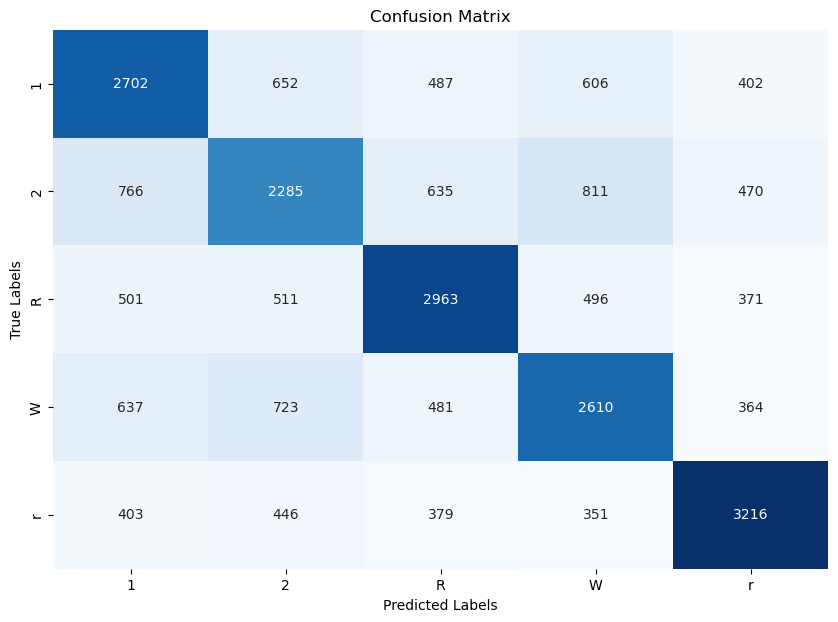

In [135]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))  # Set the size of the plot
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['1', '2', 'R', 'W', 'r'],  
            yticklabels=['1', '2', 'R', 'W', 'r'],
            cbar=False)  # Disable color bar

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()